# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#API call url
weather_url = 'http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID='

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(cities)

['nikolskoye', 'barbastro', 'butaritari', 'provideniya', 'etchoropo', 'synya', 'puerto ayora', 'bethel', 'upernavik', 'souillac', 'victoria', 'hofn', 'busselton', 'ushuaia', 'hilo', 'taolanaro', 'caravelas', 'sola', 'killorglin', 'jiaonan', 'rikitea', 'biloela', 'kota belud', 'oga', 'palasa', 'bengkulu', 'menongue', 'torbay', 'iqaluit', 'kuche', 'barrow', 'port alfred', 'wajid', 'port elizabeth', 'khatanga', 'atuona', 'tuktoyaktuk', 'vaini', 'achisay', 'dwarka', 'bayan', 'ponerihouen', 'shelby', 'samusu', 'uvat', 'rocha', 'albany', 'bredasdorp', 'saldanha', 'raudeberg', 'salalah', 'bontang', 'kihei', 'kodiak', 'saint george', 'saskylakh', 'bluff', 'chichester', 'agnibilekrou', 'hobart', 'auki', 'sosnovo-ozerskoye', 'sorland', 'sobolevo', 'arraial do cabo', 'mandi bahauddin', 'shingu', 'beira', 'punta arenas', 'airai', 'sonoita', 'praya', 'khonuu', 'dikson', 'belushya guba', 'gamba', 'kapaa', 'kacuni', 'sao francisco', 'kabanjahe', 'inhambane', 'qabis', 'nanortalik', 'yenagoa', 'leningr

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
print("Beginning Data Retrevial\n--------------------------------------")

api_url = 'http://api.openweathermap.org/data/2.5/weather?appid=' +api_key +'&q='
data = {"id": 1,"name": "",
         "lon": "","lat": "",
         "temp": "",
         "humidity": "", 
         "clouds": "",
         "wind": ""}
citiDF = pd.DataFrame(data, index = [0])
for city in cities:
    try:
        query_url = api_url + city.capitalize()
        #print(query_url)
        weather_check = requests.get(query_url)
        #print(weather_check)
        weather_response = weather_check.json()
        #print(weather_response)
        #print(weather_response["id"], weather_response["name"])
        new_row = {"id": weather_response["id"],"name":weather_response["name"],
         "lon": weather_response["coord"]["lon"],"lat": weather_response["coord"]["lat"],
         "temp": weather_response["main"]["temp"],
         "humidity":weather_response["main"]["humidity"], 
         "clouds": weather_response["clouds"]["all"],
         "wind": weather_response["wind"]["speed"]}
        citiDF = citiDF.append(new_row, ignore_index=True)
    except:
        print(city)
        
citiDF = citiDF.drop([0])

Beginning Data Retrevial
--------------------------------------
taolanaro
palasa
bengkulu
kuche
achisay
samusu
khonuu
belushya guba
qabis
illoqqortoormiut
halalo
sentyabrskiy
ngukurr
nguiu
santarem
saleaula
tumannyy
sorvag
nizhneyansk
caineni
gurgan
asau
kazalinsk
tsihombe
amderma
grand river south east
attawapiskat
camana
burica
phrai bung
bardiyah
nakhodka
vaitupu
labutta
zachagansk
olafsvik
ji-parana
odweyne
phan rang
jabiru
manzil tamim
asayita
richard toll
umzimvubu
layou
mocambique
fevralsk
alotau
asfi
ust-bolsheretsk
mys shmidta
barentsburg
hihifo
felidhoo
solsvik
yanchukan
karaul


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
citiDF.to_csv(r'WeatherData.csv')

In [10]:
citiDF.head()

,id,name,lon,lat,temp,humidity,clouds,wind
1,546105,Nikolskoye,30.79,59.7,267.86,92,75,3
2,3128795,Barbastro,0.13,42.04,274.59,100,90,0.5
3,2110227,Butaritari,172.79,3.07,301.9,78,72,6.5
4,4031574,Provideniya,-173.23,64.42,252.24,83,0,6.03
5,4006387,Etchoropo,-109.67,26.77,282.61,83,0,0.89


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

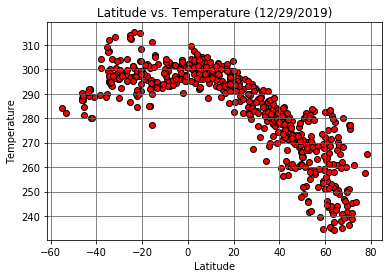

In [26]:
plt.scatter(citiDF["lat"], citiDF["temp"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude vs. Temperature (12/29/2019)")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.savefig('Latitude vs. Temperature.jpg')

#### Latitude vs. Humidity Plot

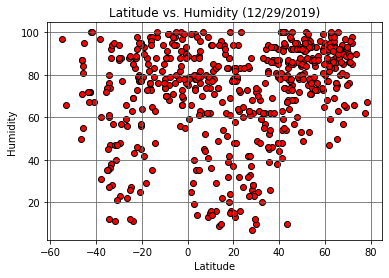

In [25]:
plt.scatter(citiDF["lat"], citiDF["humidity"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude vs. Humidity (12/29/2019)")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.savefig('Latitude vs. Humidity.jpg')

#### Latitude vs. Cloudiness Plot

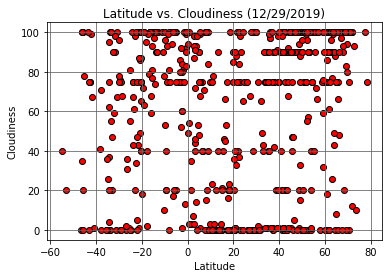

In [24]:
plt.scatter(citiDF["lat"], citiDF["clouds"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude vs. Cloudiness (12/29/2019)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.savefig('Latitude vs. Cloudiness.jpg')

#### Latitude vs. Wind Speed Plot

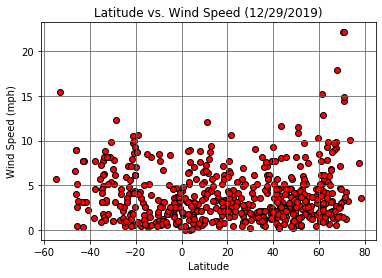

In [28]:
plt.scatter(citiDF["lat"], citiDF["wind"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude vs. Wind Speed (12/29/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.savefig('Latitude vs. Wind Speed.jpg')